Лабораторная работа 5.
Тестирование качества работы моделей машинного обучения

In [12]:
!pip install pytest

Генерация и визуализация датасетов

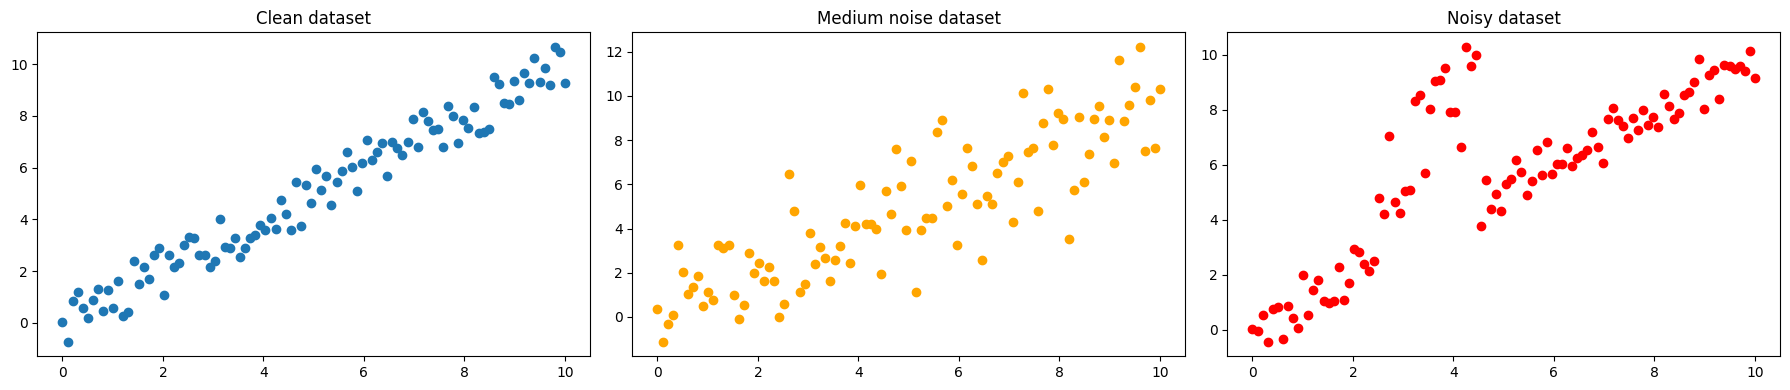

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Общее пространство x
xs = np.linspace(0, 10, 100)

# Чистый датасет
ys_clean = xs + np.random.random(100) * 2 - 1

# Средний шум
ys_medium = xs + np.random.normal(0, 1.5, size=100)

# Сильный шум (выбросы)
ys_noisy = xs + np.random.random(100) * 2 - 1
ys_noisy[25:45] *= 2

# Визуализация
plt.figure(figsize=(18, 4))

plt.subplot(1, 3, 1)
plt.scatter(xs, ys_clean)
plt.title("Clean dataset")

plt.subplot(1, 3, 2)
plt.scatter(xs, ys_medium, color="orange")
plt.title("Medium noise dataset")

plt.subplot(1, 3, 3)
plt.scatter(xs, ys_noisy, color="red")
plt.title("Noisy dataset")

plt.tight_layout()
plt.show()

Обучение модели и вывод MSE

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Обучение на чистом
model_clean = LinearRegression().fit(xs.reshape(-1, 1), ys_clean)
mse_clean = mean_squared_error(ys_clean, model_clean.predict(xs.reshape(-1, 1)))
print("MSE (clean dataset):", mse_clean)

# Обучение на среднем
model_medium = LinearRegression().fit(xs.reshape(-1, 1), ys_medium)
mse_medium = mean_squared_error(ys_medium, model_medium.predict(xs.reshape(-1, 1)))
print("MSE (medium noise dataset):", mse_medium)

# Обучение на шумном
model_noisy = LinearRegression().fit(xs.reshape(-1, 1), ys_noisy)
mse_noisy = mean_squared_error(ys_noisy, model_noisy.predict(xs.reshape(-1, 1)))
print("MSE (noisy dataset):", mse_noisy)




MSE (clean dataset): 0.3558782705455319
MSE (medium noise dataset): 2.6285776978756257
MSE (noisy dataset): 2.934209033827348


Тестирование модели

In [15]:
%%writefile test_model.py
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def generate_dataset(type="clean"):
    xs = np.linspace(0, 10, 100)
    if type == "clean":
        ys = xs + np.random.random(100) * 2 - 1
    elif type == "medium":
        ys = xs + np.random.normal(0, 1.5, size=100)
    elif type == "noisy":
        ys = xs + np.random.random(100) * 2 - 1
        ys[25:45] *= 2
    else:
        raise ValueError("Unknown dataset type")
    return xs.reshape(-1, 1), ys

def test_clean_data():
    X, y = generate_dataset("clean")
    model = LinearRegression().fit(X, y)
    mse = mean_squared_error(y, model.predict(X))
    print("Clean MSE:", mse)
    assert mse < 1.5

def test_medium_noise():
    X, y = generate_dataset("medium")
    model = LinearRegression().fit(X, y)
    mse = mean_squared_error(y, model.predict(X))
    print("Medium MSE:", mse)
    assert 1.5 < mse < 10

def test_noisy_data():
    X, y = generate_dataset("noisy")
    model = LinearRegression().fit(X, y)
    mse = mean_squared_error(y, model.predict(X))
    print("Noisy MSE:", mse)
    assert mse > 10


Overwriting test_model.py


Запуск тестов

In [16]:
!pytest test_model.py -v




============================= test session starts ==============================
platform linux -- Python 3.11.12, pytest-8.3.5, pluggy-1.6.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: typeguard-4.4.2, langsmith-0.3.43, anyio-4.9.0
collected 3 items                                                              

test_model.py::test_clean_data PASSED                                    [ 33%]
test_model.py::test_medium_noise PASSED                                  [ 66%]
test_model.py::test_noisy_data FAILED                                    [100%]

=================================== FAILURES ===================================
_______________________________ test_noisy_data ________________________________

    def test_noisy_data():
        X, y = generate_dataset("noisy")
        model = LinearRegression().fit(X, y)
        mse = mean_squared_error(y, model.predict(X))
        print("Noisy MSE:", mse)
>       assert mse > 10
E       assert 2.67308541546404